# Initialization and Setup

This code loads in the CSV file, and sets up the data.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./The Cannabis Depot-2021-07-16-activity-export.csv", dtype={'Cost': 'str'}, low_memory=False)
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], format='%Y-%m-%d %H:%M')

# Data Columns

These are the data points available that we can work with

In [124]:
df.dtypes

Green Bits ID                      object
Transaction Date           datetime64[ns]
Transaction ID                     object
Transaction Type                   object
Product Name                       object
SKU                                object
Category Name                      object
Pricing Tier                       object
Product Type                       object
Concentrate Type                   object
Product Weight (Actual)            object
Quantity                          float64
Cost                               object
Amount                            float64
Account Name                       object
Account Type                       object
Account Sub Type                   object
Discount Name                      object
Device Name                        object
Vendor                             object
Cashier Username                   object
Cashier First Name                 object
Cashier Last Name                  object
Cashier Full Name                 

# Highest Selling Budtenders

Sorted by Quanitity of Product Sold. "Amount" values need to be cleaned up, they currently include both debit and credit accounts.

In [161]:
df.groupby(["Cashier Username"])[["Quantity"]].sum().sort_values("Quantity", ascending=False)

,Quantity
Cashier Username,
dmseale,3004.0
jonwessel,2994.0
ashleygm,2950.0
aohmes,2949.0
rdhansen,2859.0
nik04,2767.0
mahlonp,2744.0
mmcclure,2611.0
stephont,2419.0


# Best Selling Products
Best selling products and product types over the period.

                  Quantity
Product Type              
Flower             23734.0
Concentrate        16095.0
Pre-Roll            8632.0
Edible (Solid)      5599.0
Paraphernalia       3319.0
Infused Pre-Roll    1552.0
Edible (Liquid)      363.0
Topical              178.0


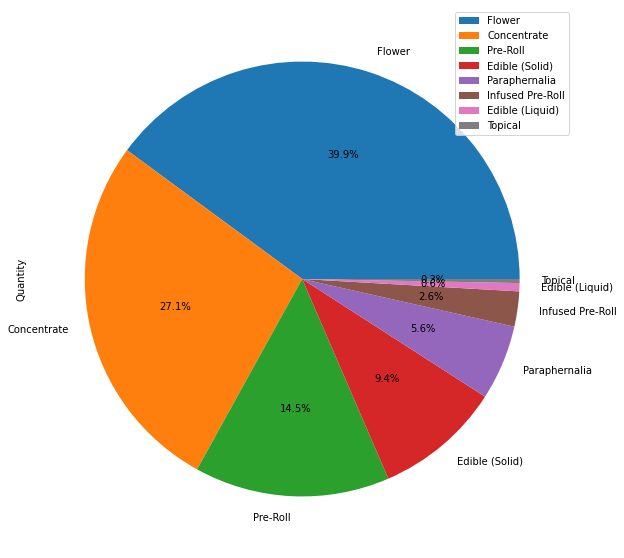

In [171]:
pie_data = df.groupby(["Product Type"])[["Quantity"]].sum().sort_values("Quantity", ascending=False)
print(pie_data)
plot = pie_data.plot.pie(y='Quantity', figsize=(10, 10), autopct='%1.1f%%')

In [163]:
df.groupby(["Product Name"])[["Quantity"]].sum().sort_values("Quantity", ascending=False)

,Quantity
Product Name,
BFE | Sunshine Daydream,1187.0
CCR | Sour Banana,917.0
BFE | Banana Runtz,816.0
LEAN | Pre Roll |(I) PREZIDENTIAL KUSH,802.0
STEALTH | Purple Urkle - Pre-Roll |,794.0
...,...
WE | Shatter | (I) Original Glue,1.0
GLAS | Purple Sunset,1.0
Glass Pineapple Bong,1.0


# Summary
Breakdown of Sales Revenue and Tax Revenue by Type

In [164]:
df.groupby(["Account Name"])[["Amount"]].sum().sort_values("Amount", ascending=False)

,Amount
Account Name,
Cash,1911094.48
Discounts,150307.15
Returns,613.67
CO State Sales Tax,-595.21
Pueblo County Tax,-108685.85
CO State Tax,-229193.21
Sales,-1723541.03


# Daily Breakdown

Daily gross sales amount, not incl. tax. Sorted by Sales Amount 

In [165]:
df.index = df['Transaction Date']

#create df containing only Cash account transactions
revenue_df = df[df['Account Name'] == 'Cash']


#df[(df['Account Name'] == 'CO State Sales Tax') & (df['Account Name'] == 'Pueblo County Tax') &  (df['Account Name'] == 'CO State Tax')]


#Sum by day and sort descending
sales_by_day = revenue_df.groupby(pd.Grouper(freq='D')).sum().sort_values("Transaction Date", ascending=False)
revenue_df.groupby(pd.Grouper(freq='D'))[["Amount"]].sum().sort_values("Amount", ascending=False)

,Amount
Transaction Date,
2021-06-11,80138.57
2021-06-04,80087.84
2021-06-05,79272.38
2021-06-12,76583.64
2021-06-25,76207.55
2021-06-26,74514.21
2021-06-18,72889.03
2021-06-19,72788.00
2021-06-13,68973.63


# Total Gross Revenue over the Period

In [130]:
revenue_df['Amount'].sum()

1911094.48

<BarContainer object of 30 artists>

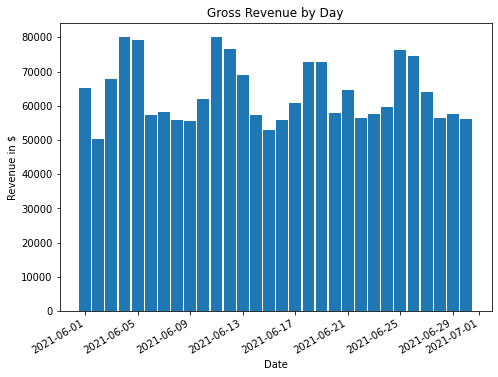

In [131]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
width = .90
ax.set_title('Gross Revenue by Day')
ax.set_ylabel('Revenue in $')
ax.set_xlabel('Date')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

days = sales_by_day.index
total_sales = sales_by_day["Amount"]

ax.bar(days, total_sales, width)

# Unique Customers

In [132]:
### CUSTOMERS ### 
# variable to hold the count
cust_cnt = 0
names = []
  
# loop for counting the unique customer names
for i in range(0, len(df['Customer Full Name'])):
    
    if df['Customer Full Name'][i] not in names: 
        
        names.append(df['Customer Full Name'][i])
          
        cust_cnt += 1
  
print("Number of Unique Customers:",
      cust_cnt)

### EMAILS ### 
# variables to hold the count
email_cnt = 0
emails = []

#### Emails
# loop for counting the unique
# values in height
for i in range(0, len(df['Customer Email'])):
    
    if df['Customer Email'][i] not in emails: 
        
        emails.append(df['Customer Email'][i])
          
        email_cnt += 1
  
print("Number of Unique Email Addresses:",
      email_cnt)

print("Percentage of Customers w/ Email on File:", ((email_cnt / cust_cnt)*100), "%")

Number of Unique Customers: 11149
Number of Unique Email Addresses: 224
Percentage of Customers w/ Email on File: 2.0091488025831916 %


# Popular Discounts

In [175]:
sales_df = df[df['Account Type'] == 'Revenue']
sales_df.groupby(["Discount Name"])[["Quantity"]].sum().sort_values("Quantity", ascending=False)

,Quantity
Discount Name,
100 Points,7364.0
0-4gm/$55 Concentrate,3635.0
200 Points,3469.0
*10 % Military Discount,2781.0
Top Shelf Pre-Roll 7/35,2470.0
300 Points,1633.0
*Industry Discount,1630.0
!*$10 off Purchase of $50 or more,1163.0
=Top Shelf 28/$110,997.0


# Flower Tier Breakdown
Number of times flower was purchased at our everyday low prices.

Times each tier was purchased:
 150 PREMIER      14716
110 Top Shelf     4473
70 Flower         3911
39 Pre Weigh       320
Name: Pricing Tier, dtype: int64


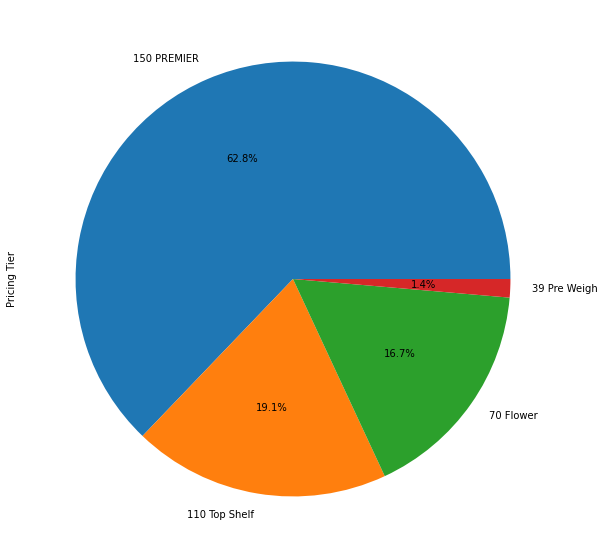

In [170]:
print("Times each tier was purchased:\n", sales_df['Pricing Tier'].value_counts())
pie_chart = sales_df['Pricing Tier'].value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')

# Best Selling Vendors

In [178]:
sales_df["Amount"] * -1 
sales_df.groupby(["Vendor"])[["Amount"]].sum().sort_values("Amount", ascending=False)

,Amount
Vendor,
BUD FOX ENTERPRISES LLC,229463.06
HIGH MARK ENTERPRISES LLC,104602.71
SANDERS ENTERPRISE LLC,82081.92
STEALTHFARMS LLC,80287.47
INFUZIONZ LLC,80029.02
...,...
The Cannabis Depot,9.72
DALWHINNIE FARMS LLC,1.72
ISM2 INC,0.06


# Average Transaction Price

In [203]:

sales_df.groupby(["Transaction ID"]).sum().sort_values("Amount", ascending=False)

total_trans_value = sales_df.loc[sales_df['Amount'] < 0].sum(numeric_only=True)["Amount"]
total_trans_value = total_trans_value * -1

### Transactions ### 
# variables to hold the count
trans_cnt = 0
trans_id = []

#### Emails
# loop for counting the unique
# values in height
for i in range(0, len(sales_df['Transaction ID'])):
    
    if sales_df['Transaction ID'][i] not in trans_id: 
        
        trans_id.append(sales_df['Transaction ID'][i])
          
        trans_cnt += 1
  
print("Number of Transactions:",
      trans_cnt)

print("Avg Transaction Value: $", round((total_trans_value / trans_cnt), 2))

Number of Transactions: 23599
Avg Transaction Value: $ 6.75


# Transactions by Price Point

<AxesSubplot:ylabel='counts'>

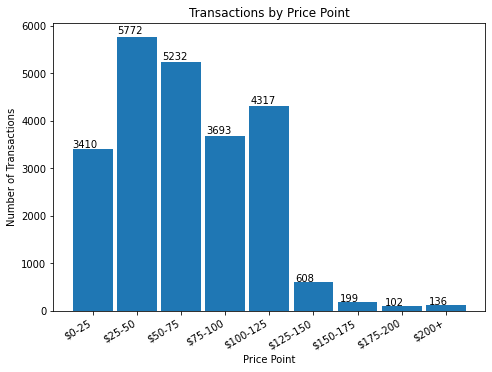

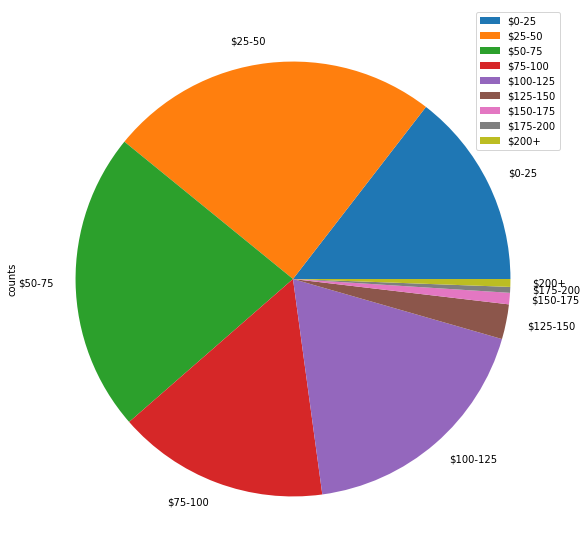

In [204]:
transaction_df = sales_df.groupby(["Transaction ID"])[["Amount"]].sum().sort_values("Amount", ascending=False)

# $0-25
tier1 = 0
# $25-50
tier2 = 0
# $50-75
tier3 = 0
# $75-100
tier4 = 0
# $100-125
tier5 = 0
# $125-150
tier6 = 0
# $150-175
tier7 = 0
# $175-200
tier8 = 0
# $200+
tier9 = 0

for i in range(0, len(transaction_df.index)):
    
    if (transaction_df['Amount'][i] > 0) and (transaction_df['Amount'][i] <= 25): 
        tier1 += 1
    elif (transaction_df['Amount'][i] > 25) and (transaction_df['Amount'][i] <= 50):
        tier2 += 1
    elif (transaction_df['Amount'][i] > 50) and (transaction_df['Amount'][i] <= 75):
        tier3 += 1
    elif (transaction_df['Amount'][i] > 75) and (transaction_df['Amount'][i] <= 100):
        tier4 += 1
    elif (transaction_df['Amount'][i] > 100) and (transaction_df['Amount'][i] <= 125):
        tier5 += 1
    elif (transaction_df['Amount'][i] > 125) and (transaction_df['Amount'][i] <= 150):
        tier6 += 1
    elif (transaction_df['Amount'][i] > 150) and (transaction_df['Amount'][i] <= 175):
        tier7 += 1
    elif (transaction_df['Amount'][i] > 175) and (transaction_df['Amount'][i] <= 200):
        tier8 += 1
    elif (transaction_df['Amount'][i] > 200):
        tier9 += 1
    else:
        pass

fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
width = .90
ax.set_title('Transactions by Price Point')
ax.set_ylabel('Number of Transactions')
ax.set_xlabel('Price Point')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


tiers = ["$0-25", "$25-50", "$50-75", "$75-100", "$100-125", "$125-150", "$150-175", "$175-200", "$200+"]
transactions = [tier1, tier2, tier3, tier4, tier5, tier6, tier7, tier8, tier9]

ax.bar(tiers, transactions, width)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

tiers_df = pd.DataFrame({"counts": transactions},
                        index=tiers)
tiers_df.plot.pie(y='counts', figsize=(10,10), autopct='%1.1f%%')
